# Fourier Transform and Telephone
In this notebook, we're gonna solve a very interesting task.
- AmirMohammad Babaei
- 9831011

## import required libraries
- Matplotlib
- Numpy
- Scipy


In [197]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.io.wavfile import read, write
from scipy.fft import fft, fftfreq

%matplotlib inline

## Implementation

### load sound file
in this section, I loaded tone.wav file


In [183]:
sample_rate, data = read('../tone.wav')
length = data.shape[0] / sample_rate
time = np.linspace(0., length, data.shape[0])

### plot sound in Time-Domain

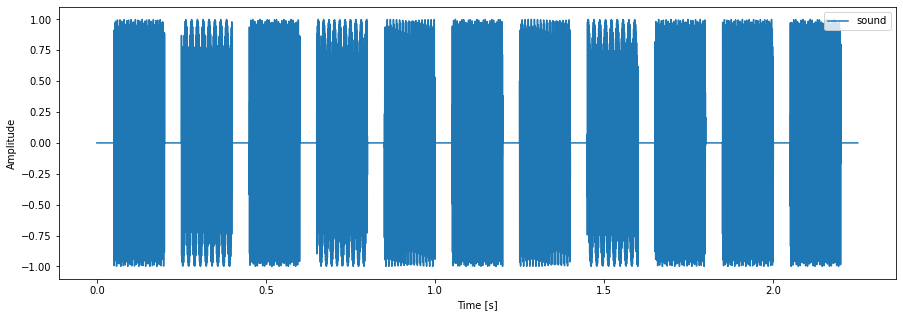

In [175]:
plt.figure(figsize=(15, 5))
plt.plot(time, data, label='sound')
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.legend()

### compute Fourier Transform of the sound

In [176]:
y_freq = fft(data)
x_freq = fftfreq(data.shape[0], 1 / sample_rate)

### plot Fourier Transform of the sound

Text(0, 0.5, 'Power')

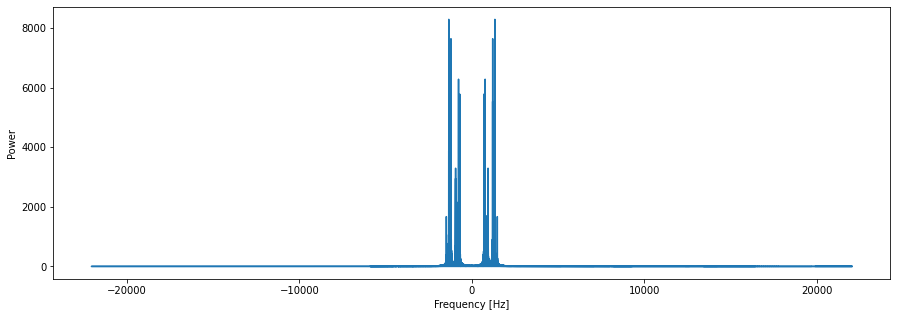

In [177]:
plt.figure(figsize=(15, 5))
plt.plot(x_freq, np.abs(y_freq))
plt.xlabel("Frequency [Hz]")
plt.ylabel("Power")

### Time Window Slicing

In [55]:
def make_time_window(data, window_sample_num=2048):
    data_num = int(data.shape[0] - (data.shape[0] % window_sample_num))
    matrix_data = data[:data_num].reshape(-1, window_sample_num).T
    print(f'{matrix_data.shape=}')
    return matrix_data

In [193]:
def time_window_phone_number_decode(data, window_sample_num=2048):
    # convert data array to desired Matrix
    matrix_data = make_time_window(data, window_sample_num=window_sample_num)
    
    # compute Fourier Transform
    y_freq_win = fft(matrix_data, axis=0)
    x_freq_win = fftfreq(matrix_data.shape[0], 1 / sample_rate)
    
    # compute indices of frequncies between 0Hz and 2000Hz
    indices = (x_freq_win >= 0) & (x_freq_win < 2000)
    print(f'{indices=}')
    
    # plot the final frequency
    plt.figure(figsize=(15, 5))
    extent = [0 , (y_freq_win.shape[1]/sample_rate)*window_sample_num, 2000 , 0]
    plt.imshow(np.abs(y_freq_win[indices, :]), aspect='auto', extent=extent)
    plt.xlabel("Time [s]")
    plt.ylabel("Frequency [Hz]")
    plt.colorbar()

#### Sample Number = 2048

matrix_data.shape=(2048, 48)
indices=array([ True,  True,  True, ..., False, False, False])


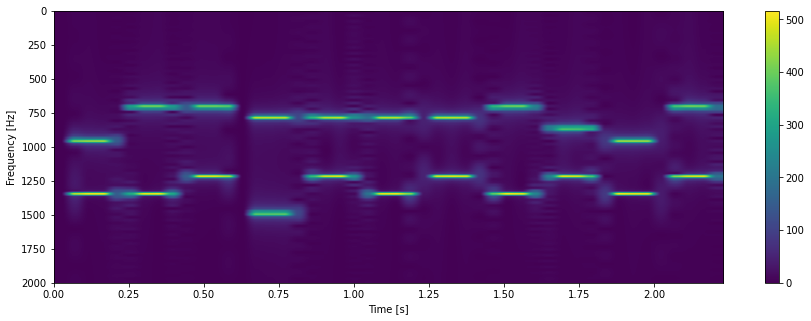

In [194]:
time_window_phone_number_decode(data)

|Number of window|1|2|3|4|5|6|7|8|9|10|11|
|:--|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|
|low Frequency|941|697|697|770|770|770|770|697|852|941|697|
|high Frequency|1336|1336|1209|1477|1209|1336|1209|1336|1209|1336|1209|
|Key pressed|0|2|1|6|4|5|4|2|7|0|1|

#### Sample Number = 1024

matrix_data.shape=(1024, 96)
indices=array([ True,  True,  True, ..., False, False, False])


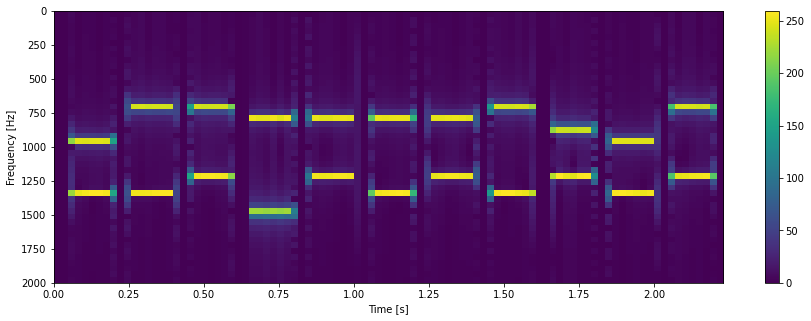

In [195]:
time_window_phone_number_decode(data, 1024)

#### Sample Number = 4096

matrix_data.shape=(4096, 24)
indices=array([ True,  True,  True, ..., False, False, False])


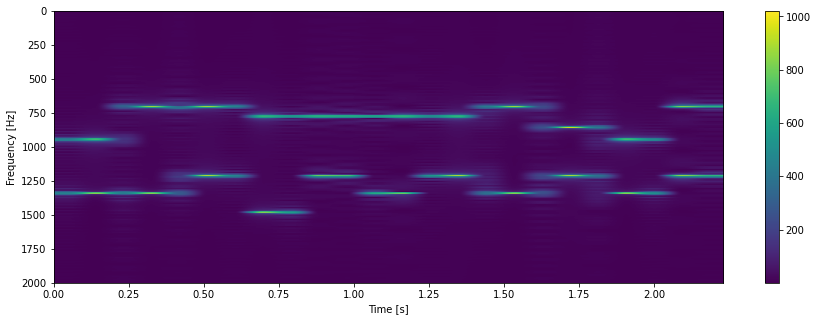

In [196]:
time_window_phone_number_decode(data, 4096)

As the Sample Number increases, the precision of computed frequencies in each sample will increase.